## Importing necessary packages

In [10]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the data

In [11]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Scaling for quicker execution

In [12]:
X_train, X_test = X_train/255.0, X_test/255.0

## Part 1 Question 1

### Building a linear model using tf.keras sequential api

### Using a single Dense Layer with Softmax to get final probabilities

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
], name='linear_model')

### Compiling the model

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

### Fit the model and check performance on validation

In [15]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.5015 - acc: 0.8706 - val_loss: 0.3160 - val_acc: 0.9123
Epoch 2/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.3176 - acc: 0.9117 - val_loss: 0.2894 - val_acc: 0.9211
Epoch 3/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.2933 - acc: 0.9180 - val_loss: 0.2772 - val_acc: 0.9224
Epoch 4/10
48000/48000 [==============================] - 5s 95us/step - loss: 0.2814 - acc: 0.9214 - val_loss: 0.2733 - val_acc: 0.9257
Epoch 5/10
48000/48000 [==============================] - 4s 93us/step - loss: 0.2737 - acc: 0.9232 - val_loss: 0.2668 - val_acc: 0.9275
Epoch 6/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.2683 - acc: 0.9250 - val_loss: 0.2621 - val_acc: 0.9281
Epoch 7/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.2637 - acc: 0.9264 - val_loss: 0.2663 - val_acc

### Evaluation of the model on the test set

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 35us/step


In [17]:
print('Test Loss: {0:.4f}'.format(loss))
print('Test Accuracy: {0:.3f}'.format(accuracy))

Test Loss: 0.2661
Test Accuracy: 0.928


## Part 1 Question 2

### Building a deep model using tf.keras sequential api

### Function to run different networks

In [18]:
def get_model(model, epochs=20):    
    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy', 'sparse_categorical_crossentropy'])
    
    model_history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2)
    
    return model, model_history

### Building a small network

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
], name = 'small_network')

In [20]:
small_network_model, small_network_history = get_model(model, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 106us/step - loss: 0.5614 - acc: 0.8443 - sparse_categorical_crossentropy: 0.5614 - val_loss: 0.3072 - val_acc: 0.9137 - val_sparse_categorical_crossentropy: 0.3072
Epoch 2/20
48000/48000 [==============================] - 5s 98us/step - loss: 0.3098 - acc: 0.9132 - sparse_categorical_crossentropy: 0.3098 - val_loss: 0.2813 - val_acc: 0.9233 - val_sparse_categorical_crossentropy: 0.2813
Epoch 3/20
48000/48000 [==============================] - 5s 103us/step - loss: 0.2855 - acc: 0.9192 - sparse_categorical_crossentropy: 0.2855 - val_loss: 0.2698 - val_acc: 0.9254 - val_sparse_categorical_crossentropy: 0.2698
Epoch 4/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.2732 - acc: 0.9227 - sparse_categorical_crossentropy: 0.2732 - val_loss: 0.2665 - val_acc: 0.9264 - val_sparse_categorical_crossentropy: 0.2665
Epoch 5/20
48000/48000 [========================

### Building a medium network

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
], name = 'medium_network')

In [22]:
med_network_model, med_network_history = get_model(model, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 14s 288us/step - loss: 0.2953 - acc: 0.9152 - sparse_categorical_crossentropy: 0.2953 - val_loss: 0.1802 - val_acc: 0.9484 - val_sparse_categorical_crossentropy: 0.1802
Epoch 2/20
48000/48000 [==============================] - 14s 298us/step - loss: 0.1311 - acc: 0.9617 - sparse_categorical_crossentropy: 0.1311 - val_loss: 0.1201 - val_acc: 0.9653 - val_sparse_categorical_crossentropy: 0.1201
Epoch 3/20
48000/48000 [==============================] - 14s 302us/step - loss: 0.0893 - acc: 0.9736 - sparse_categorical_crossentropy: 0.0893 - val_loss: 0.1026 - val_acc: 0.9682 - val_sparse_categorical_crossentropy: 0.1026
Epoch 4/20
48000/48000 [==============================] - 15s 307us/step - loss: 0.0660 - acc: 0.9799 - sparse_categorical_crossentropy: 0.0660 - val_loss: 0.0931 - val_acc: 0.9721 - val_sparse_categorical_crossentropy: 0.0931
Epoch 5/20
48000/48000 [==================

### Building a large network

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
], name = 'large_network')

In [24]:
large_network_model, large_network_history = get_model(model, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 29s 608us/step - loss: 0.2231 - acc: 0.9340 - sparse_categorical_crossentropy: 0.2231 - val_loss: 0.1079 - val_acc: 0.9665 - val_sparse_categorical_crossentropy: 0.1079
Epoch 2/20
48000/48000 [==============================] - 28s 589us/step - loss: 0.0895 - acc: 0.9728 - sparse_categorical_crossentropy: 0.0895 - val_loss: 0.0946 - val_acc: 0.9720 - val_sparse_categorical_crossentropy: 0.0946
Epoch 3/20
48000/48000 [==============================] - 29s 601us/step - loss: 0.0613 - acc: 0.9807 - sparse_categorical_crossentropy: 0.0613 - val_loss: 0.0884 - val_acc: 0.9744 - val_sparse_categorical_crossentropy: 0.0884
Epoch 4/20
48000/48000 [==============================] - 26s 551us/step - loss: 0.0448 - acc: 0.9860 - sparse_categorical_crossentropy: 0.0448 - val_loss: 0.0836 - val_acc: 0.9762 - val_sparse_categorical_crossentropy: 0.0836
Epoch 5/20
48000/48000 [==================

### Building a large network with Dropout

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
], name = 'large_network_with_dropout')

In [26]:
large_drp_network_model, large_drp_network_history = get_model(model, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 31s 637us/step - loss: 0.2852 - acc: 0.9132 - sparse_categorical_crossentropy: 0.2852 - val_loss: 0.1251 - val_acc: 0.9627 - val_sparse_categorical_crossentropy: 0.1251
Epoch 2/20
48000/48000 [==============================] - 30s 625us/step - loss: 0.1337 - acc: 0.9593 - sparse_categorical_crossentropy: 0.1337 - val_loss: 0.1021 - val_acc: 0.9699 - val_sparse_categorical_crossentropy: 0.1021
Epoch 3/20
48000/48000 [==============================] - 30s 624us/step - loss: 0.1004 - acc: 0.9692 - sparse_categorical_crossentropy: 0.1004 - val_loss: 0.0934 - val_acc: 0.9713 - val_sparse_categorical_crossentropy: 0.0934
Epoch 4/20
48000/48000 [==============================] - 30s 627us/step - loss: 0.0813 - acc: 0.9745 - sparse_categorical_crossentropy: 0.0813 - val_loss: 0.0807 - val_acc: 0.9763 - val_sparse_categorical_crossentropy: 0.0807
Epoch 5/20
48000/48000 [==================

### Function to plot the metric of interest against training epochs

In [27]:
def plot_history(histories, key='sparse_categorical_crossentropy'):
    
    """
    Not sure if this works when epoch=1 but works when epoch is higher than 1
    """
    plt.figure(figsize=(20,10))
    for name, model_history in histories:
      train = plt.plot([x+1 for x in model_history.epoch], model_history.history[key],
                         label='Train '+ name)
      plt.plot([x+1 for x in model_history.epoch], model_history.history['val_'+ key], '--', color=train[0].get_color(),
                   label='Val ' + name)

    plt.xlabel('Epochs', fontsize=12)
    plt.xticks([x+1 for x in model_history.epoch])
    plt.ylabel(key.replace('_',' '), fontsize=12)
    plt.legend(loc=1, prop={'size': 12})

### Plotting the sparse categorical cross entropy for different networks

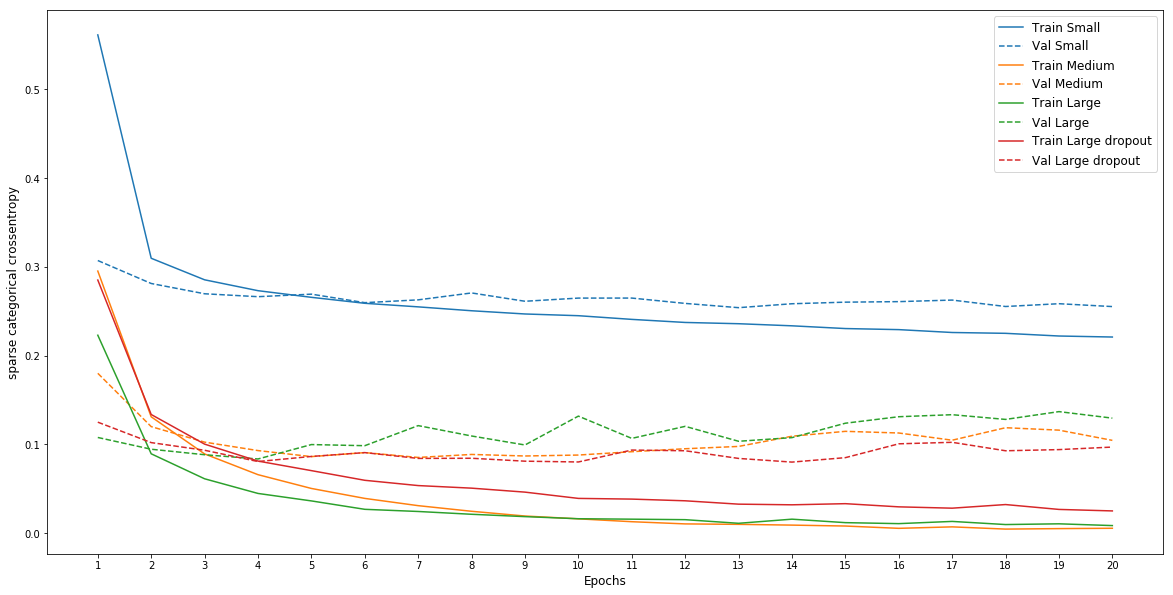

In [28]:
plot_history([('Small', small_network_history),
              ('Medium', med_network_history),
              ('Large', large_network_history),
              ('Large dropout', large_drp_network_history)], key='sparse_categorical_crossentropy')

### Function to obtain the best model based on performance

In [29]:
def find_best_model_epoch(histories, key='val_sparse_categorical_crossentropy', better='lower'):
    low_key_val = 1000.0
    high_key_val = 0.0
    for model, model_history in histories:
        key_val = np.array(model_history.history[key])
        if better == 'lower':
            best_val = np.min(key_val)
            if best_val < low_key_val:
                low_key_val = best_val
                best_model = model
                best_model_name = model.name
                best_epoch = np.argmin(key_val) + 1

        elif better == 'higher':
            best_val = np.max(key_val)
            if best_val > high_key_val:
                high_key_val = best_val
                best_model = model
                best_model_name = model.name
                best_epoch = np.argmax(key_val) + 1
        
    return best_model, best_model_name, best_epoch

### Finding the model with the lowest validation loss

In [30]:
best_model, best_model_name, best_epoch = find_best_model_epoch([(small_network_model, small_network_history),
              (med_network_model, med_network_history),
              (large_network_model, large_network_history),
              (large_drp_network_model, large_drp_network_history)], key='val_sparse_categorical_crossentropy', better='lower')

### Fitting the model using the parameters obtained above
#### Better approach is to checkpoint model weights but not able to save checkpointed weights on colab - so skipping

In [31]:
best_network_model, best_network_history = get_model(best_model, epochs=best_epoch)

Train on 48000 samples, validate on 12000 samples
Epoch 1/14
48000/48000 [==============================] - 33s 684us/step - loss: 0.0298 - acc: 0.9914 - sparse_categorical_crossentropy: 0.0298 - val_loss: 0.0966 - val_acc: 0.9814 - val_sparse_categorical_crossentropy: 0.0966
Epoch 2/14
48000/48000 [==============================] - 34s 701us/step - loss: 0.0256 - acc: 0.9924 - sparse_categorical_crossentropy: 0.0256 - val_loss: 0.1015 - val_acc: 0.9785 - val_sparse_categorical_crossentropy: 0.1015
Epoch 3/14
48000/48000 [==============================] - 32s 673us/step - loss: 0.0248 - acc: 0.9921 - sparse_categorical_crossentropy: 0.0248 - val_loss: 0.1055 - val_acc: 0.9801 - val_sparse_categorical_crossentropy: 0.1055
Epoch 4/14
48000/48000 [==============================] - 32s 672us/step - loss: 0.0242 - acc: 0.9923 - sparse_categorical_crossentropy: 0.0242 - val_loss: 0.1072 - val_acc: 0.9786 - val_sparse_categorical_crossentropy: 0.1072
Epoch 5/14
48000/48000 [==================

In [35]:
print ('The best model amongst the ones tested was the {} trained for {} epochs'.format(best_model_name.replace('_',' '), best_epoch))

The best model amongst the ones tested was the large network with dropout trained for 14 epochs


## Evaluating model on test data set

In [33]:
loss, accuracy, sparse_categorical_crossentropy = best_network_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 4s 359us/step


In [34]:
print('Test Loss: {0:.4f}'.format(loss))
print('Test Accuracy: {0:.3f}'.format(accuracy))

Test Loss: 0.0959
Test Accuracy: 0.981


# Getting Model Summaries

In [81]:
def get_model_summaries(histories, keys=['val_sparse_categorical_crossentropy','val_acc'], better=['lower', 'higher']):
    model_performance = {}
    for key in keys:
        model_performance[key] = {}
    for model, model_history in histories:
        for index, key in enumerate(keys):
            key_val = np.array(model_history.history[key])
            if better[index] == 'lower':
                best_val = np.min(key_val)
            elif better[index] == 'higher':
                best_val = np.max(key_val)
            model_performance[key][model.name.replace('_',' ')] = best_val        
    return model_performance

In [82]:
model_performance = get_model_summaries([(small_network_model, small_network_history),
              (med_network_model, med_network_history),
              (large_network_model, large_network_history),
              (large_drp_network_model, large_drp_network_history)],
            keys=['val_sparse_categorical_crossentropy','val_acc'], better=['lower', 'higher'])

In [83]:
model_performance['Validation Accuracy'] = model_performance.pop('val_acc')
model_performance['Validation Sparse Categorical Entropy Loss'] = model_performance.pop('val_sparse_categorical_crossentropy')

In [84]:
import pandas as pd
model_performance_pd = pd.DataFrame(model_performance, columns = ['Validation Accuracy', 'Validation Sparse Categorical Entropy Loss'])

## Evaluation and Summary

### Linear Model
* The linear model developed using the sequential API. It consisted of a dense layer with a softmax activation
* The linear model achieved a test loss of **0.27** and a test accuracy of **0.925** (might be slightly different on reruns)

### Deep Model
* Following networks were tried for the deep model
    * Small Network:
        * Hidden Layer 1: 10 nodes with Relu Activation
        * Output Layer: 10 nodes with Softmax Activation
<br><br>       
    * Medium Network:
        * Hidden Layer 1: 128 nodes with Relu Activation
        * Output Layer: 10 nodes with Softmax Activation
<br><br>
    * Large Network:
        * Hidden Layer 1: 256 nodes with Relu Activation
        * Hidden Layer 2: 128 nodes with Relu Activation
        * Output Layer: 10 nodes with Softmax Activation
<br><br>
    * Large Network with Dropout:
        * Hidden Layer 1: 256 nodes with Relu Activation
        * Dropout Layer 1: Dropout Rate of 0.2
        * Hidden Layer 2: 128 nodes with Relu Activation
        * Dropout Layer 2: Dropout Rate of 0.2
        * Output Layer: 10 nodes with Softmax Activation
<br><br>
* A validation split of 0.2 was used to check model performance
<br><br>
* The best model was found to be the Large Network with Dropout. Performance on the test dataset:
    * Test Loss of **0.0959**
    * Test Accuracy of **0.981**
<br><br>
* Below is the performance of various models on the validation set (not the test set)

In [89]:
model_performance_pd

,Validation Accuracy,Validation Sparse Categorical Entropy Loss
large network,0.979417,0.083627
large network with dropout,0.981833,0.080115
medium network,0.977333,0.085354
small network,0.933000,0.254103


* **It is clear that the Large Network with Dropout has the best performance on the validation set as well**

## Saving best weights to a file based on val metrics
## Checkpointing, basically - https://machinelearningmastery.com/check-point-deep-learning-models-keras/

In [63]:
def get_model(model, epochs=20):    
    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy', 'sparse_categorical_crossentropy'])

    filepath="weights.best.hdf5".format(model.name)
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    callbacks_list = [checkpoint]
    model_history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=callbacks_list)
    
    return model, model_history

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
], name = 'sm_network')

In [65]:
sm_network_model, sm_network_history = get_model(model, epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 111us/step - loss: 1.3681 - acc: 0.7165 - sparse_categorical_crossentropy: 1.3681 - val_loss: 0.8546 - val_acc: 0.8154 - val_sparse_categorical_crossentropy: 0.8546

Epoch 00001: val_loss improved from inf to 0.85456, saving model to weights.best.hdf5
Epoch 2/5
48000/48000 [==============================] - 5s 102us/step - loss: 0.7017 - acc: 0.8017 - sparse_categorical_crossentropy: 0.7017 - val_loss: 0.5942 - val_acc: 0.8172 - val_sparse_categorical_crossentropy: 0.5942

Epoch 00002: val_loss improved from 0.85456 to 0.59420, saving model to weights.best.hdf5
Epoch 3/5
48000/48000 [==============================] - 5s 114us/step - loss: 0.5538 - acc: 0.8288 - sparse_categorical_crossentropy: 0.5538 - val_loss: 0.5091 - val_acc: 0.8492 - val_sparse_categorical_crossentropy: 0.5091

Epoch 00003: val_loss improved from 0.59420 to 0.50906, saving model to weights.best.hdf5
Epoch 

### Alternatively, early stopping can be used. However, this version does not have the param restore_best_weights

In [ ]:
def get_model(model, epochs=20):    
    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy', 'sparse_categorical_crossentropy'])
    
    checkpoint = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
    callbacks_list = [checkpoint]
    model_history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=callbacks_list)
      
    return model, model_history

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
], name = 'sm_network')

In [ ]:
sm_network_model, sm_network_history = get_model(model, epochs=20)